# Stationarity in Time Series Data

## What is Stationarity?


### A Stationary Time Series is one whose properties do not change over time. Especially the below metrics,

### 1. Mean, 
### 2. Variance and 
### 3. Autocorrelation (seasonality)

### of the time series will be constant over time.

## Why Stationarity is important in Time Series Analysis.

### Most of the models assume that the observed data comes from a stationary process (constant mean and variance)
### However, the data from a business (be it sales revenue or customers) evolve over time, hence making it non-stationary and may include seasonality depending on the nature of the business. Using non-stationary time series data in the models, result in concluding high R-Squared values between 2 variables which are not at all related but only changes over time.


### When data mean and variance are time variant:
#### * Observations come from different distributions over time, posing difficult problems for empirical modeling.
#### * If not accounted for, it can result in serious statistical mistakes.

### What causes non-stationarity?
#### * Economic evolution, legislative changes, technological changes, political turmoil etc
#### * And it can be elimiated by data transformations

### How to test stationarity?

#### Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

adftest = adfuller(df)

print('p-value of adftest = '+ adftest[1])

##### Result: Lower p-value (< 0.5) implies that the series is stationary

### Making the time series Stationary...


#### Since the non-stationarity can be caused in ways (mean, variance and Autocorrelation), there are 3 ways to fix them.

#### Method# 1: Differencing the Mean

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

series = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/raw_sales.csv')
series.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


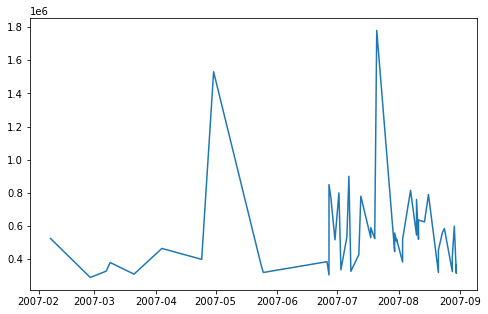

In [92]:
series['datesold'] = pd.to_datetime(series['datesold'])
series1 = series[['datesold', 'price']].set_index('datesold')[:50]

fig = plt.figure(figsize=(8,5))
plt.plot(series1)

In [93]:
# Check the stationarity using ADFULLER Test

from statsmodels.tsa.stattools import adfuller


adftest = adfuller(series1)
print('p-value of series = '+ str(adftest[1]))

p-value of series = 9.771452321566378e-11


In [ ]:
# Adfuller test results in p-value of 9.77 which is much higher than 0.05 and hence the series is non-stationary

# So, use Differencing to make it stationary. By this way, it brings down a stationary mean for the time series.

series2 = series1.diff()

fig = plt.figure(figsize=(8,5))
plt.plot(series2)

#### Method# 2: Smoothing the Seasonality

In [ ]:
# Import a dataset with seasonality

sales = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/ts_sales_data.csv')
sales = sales[:75]

sales.head()

In [ ]:
sales['date'] = pd.to_datetime(sales['date'])
sales = sales.set_index('date')
sales.plot()

In [ ]:
# Check the stationarity using the ADFULLER test to notice the p-value

adftest = adfuller(sales)
print('p-value of series = '+ str(adftest[1]))

In [ ]:
# Since the p-value (0.85) is higher than 0.05, the series is non-stationary.
# In order to make the series Stationary we need to smoothen the seasonality.
# As we can identify the seasonality every year from the plot, we shall use 12 months period for Differenciation.

sales1 = sales.diff(periods=12)
sales1 = sales1.dropna()

sales1.plot()

#### Method# 3: Smoothing the Variance

In [ ]:
# Import the dataset and make it Variance varying series

df = pd.read_csv('/Users/dileepsathyan/Documents/GitHub/datasets/ts_sales_data.csv', parse_dates=['date'])
df = df.set_index('date')
df = df.diff(periods=12).dropna()
df.plot()

In [ ]:
# Take the log of the values and Differenciate it to normalise the time varying Variance.

import numpy as np

df1 = np.log(df)

df1 = df1.diff()
df1.plot()